In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from model import print_results

In [2]:
class MonoexponentialModel(tf.keras.Model):
    def __init__(self, 
                 filling_pulse=20 * 10 ** (-6), 
                 time_constant_power=-2.0,
                 amplitude=1.0,
                 M=5.861, 
                 **kwargs):
        
        super().__init__(**kwargs)            
        
        self.filling_pulse = tf.Variable(filling_pulse, trainable=False)
        self.M = tf.Variable(M, trainable=False)
        
        self.time_constant_power = tf.Variable(time_constant_power)
        self.amplitude = tf.Variable(amplitude)
        
    def call(self, frequency):
        
        time_constant = tf.pow(10.0, self.time_constant_power)
        
        exp0 = tf.exp(-0.05 / (time_constant * frequency))
        exp1 = tf.exp((self.filling_pulse * frequency - 0.45) / (time_constant * frequency))
        exp2 = tf.exp(-0.5 / (time_constant * frequency))
        exp3 = tf.exp((self.filling_pulse * frequency - 0.95) / (time_constant * frequency))
        
        phi = time_constant * frequency * exp0 * (1.0 - exp1 - exp2 + exp3)
        
        dlts = self.amplitude * self.M * phi
        
        return dlts

In [3]:
filling_pulse=20 * 10 ** (-6)

powers = tf.linspace(0, np.log10(2500), 1000)
frequency = tf.pow(10.0, powers)

# The actual parameters
fs_model = MonoexponentialModel(filling_pulse=filling_pulse,
                                time_constant_power=-3.3,
                                amplitude=3.0
                                )

noise = tf.random.normal(stddev=0.1, shape=[frequency.shape[0]])

actual_dlts = fs_model(frequency) + noise

Initial values:
Time constant power = -2.0000 log10(s)
Time constant = 0.0100 s
Amplitude = 1.0000 pF
MSE = 1.2672
RMSE = 1.125692


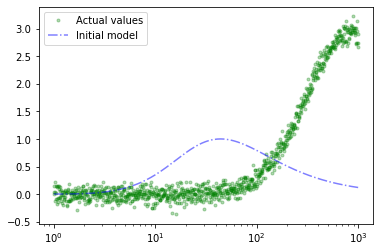

In [4]:
initial_model = MonoexponentialModel(filling_pulse=20 * 10 ** (-6))

print_results(frequency = frequency, 
              actual_dlts = actual_dlts,
              initial_model = initial_model)

In [5]:
final_model = MonoexponentialModel()

final_model.compile(run_eagerly=False,
                    loss=tf.keras.losses.MSE,
                    optimizer=tf.optimizers.Adamax(learning_rate=0.1))

history = final_model.fit(frequency, actual_dlts, epochs=1000, batch_size=100, verbose=False)

Initial values:
Time constant power = -2.0000 log10(s)
Time constant = 0.0100 s
Amplitude = 1.0000 pF
MSE = 1.2672
RMSE = 1.125692

Final values:
Time constant power = -3.2807 log10(s)
Time constant = 0.0005 s
Amplitude = 2.9994 pf
MSE = 0.0116
RMSE = 0.107586


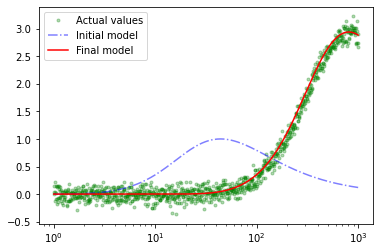

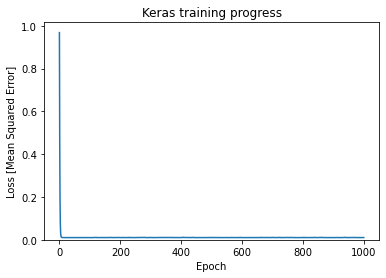

In [6]:
print_results(frequency = frequency,
              actual_dlts = actual_dlts,
              initial_model = initial_model,
              final_model = final_model,
              history = history
             )

In [7]:
final_model = MonoexponentialModel()

final_model.compile(run_eagerly=False,
                    loss=tf.keras.losses.MSE,
                    optimizer=tf.optimizers.Adagrad(learning_rate=0.1))

history = final_model.fit(frequency, actual_dlts, epochs=1000, batch_size=100, verbose=False)

Initial values:
Time constant power = -2.0000 log10(s)
Time constant = 0.0100 s
Amplitude = 1.0000 pF
MSE = 1.2672
RMSE = 1.125692

Final values:
Time constant power = -3.3012 log10(s)
Time constant = 0.0005 s
Amplitude = 3.0000 pf
MSE = 0.0103
RMSE = 0.101367


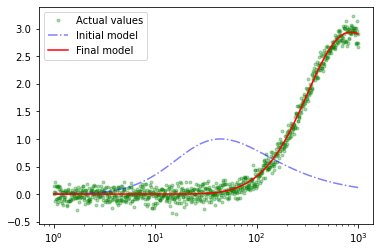

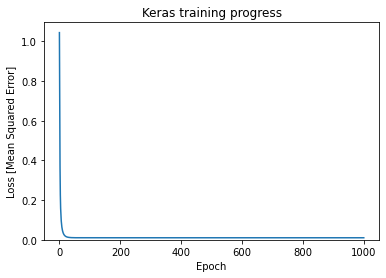

In [8]:
print_results(frequency = frequency,
              actual_dlts = actual_dlts,
              initial_model = initial_model,
              final_model = final_model,
              history = history
             )